# Instructions

In this notebook you have some problems to solve with Python coding. For each problem, explain your code with comments and explain how it works to solve the problem being addressed. You also MUST include the answers you get from running your code. These instructions may change as needed, so we suggest you read these anew on each homework (we will try to announce ahead if they change).

Collaboration is both allowed and encouraged! Using available resources from your peers is both wise and efficient. While you are welcome to work collaboratively with classmates, that means you can work together to solve problems together, not that one person does the work and others copy it. You are also welcome to use the internet as a resource to refresh your memory, clarify concepts, and help with short code snippets. In order to model good practice, you **MUST** cite your sources **at the time of assignment submission** (we will not accept citations sent after-the-fact), and you should not be copying large portions of code wholesale from any source: internet, human, artificial intelligence, or otherwise.

Things that are off limits:

 -    Soliciting (hey, what did you get for question X? Can you send me your code?) and/or copying code and/or answers from another person.

 -    Using sources appropriately but failing to cite them.

 -     Getting any AI, including ChatGPT, Gemini, or CoPilot to do your work for you.


As with every assignment in this course, begin with installing and importing the library designed for this course, ``determinism301`` using the following code in its own cell at the very beginning:
```py
!pip install -qU --extra-index-url https://determinism.data301.download determinism301
import determinism301
```

Before submitting, once you're sure your code is correct, it is recommended that you restart the session kernel under the Runtime/Kernel section and rerun your code with determinism301 to get your final answer to submit. If you have any errors that you suspect might be related to the determinism301 module, you can reference this list https://docs.google.com/document/d/1BdCadBrSKZ1rf29YWzeJ9Eh-UInUqAJZeAJVX79LxRM to see if the problem and solution are in there, and if you still can't solve it then make a private post to instructors on Piazza or Discord.

You **may not** set random_state, seed, or other similar parameters manually for any library unless explicitly instructed, as that will interfere with the reproducibility of your answers. For numpy, you **must** use the old-style ``np.random.uniform``, ``np.random.beta``, and so on distributions instead of ``np.random.default_rng().uniform``, ``np.random.default_rng().beta``, as the latter whave been made to produce stable results, but they will be different from ours which will cause difficulty grading. Using ``numpy.random.RandomState`` is also not allowed for the same reason. We will take off points for **each** problem these are used in, rather than once for the whole assignment.

We would like to make clear that you should read these instructions in full every time. There may be changes in the middle of the semester, and while we will do our best to notify you if anything changes, we are not responsible if there is something included in these instructions that wasn't read. Additionally, we will give clarifications to questions as needed on Piazza and/or Discord (depending on where the initial question came up), so we expect you to join at least one of those platforms, if not both. The links to join both are included in the syllabus.

Note: You **MUST** submit your answers as a Jupyter notebook (.ipynb), otherwise the determinism won't work.

Make sure you include (YOUR NAME, SUBQUESTION) (e.g. "Daniel Vasiliu, 2c") at the start of every code cell, it makes grading significantly easier and can help prevent any mistakes in grading your assignments.

**You may only use libraries that were imported for you at the top.**

# Import Statements

In [1427]:
!pip install -qU --extra-index-url https://determinism.data301.download determinism301
#import determinism301

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [1]:
#InstallBlock
!pip install -qU --extra-index-url https://determinism.data301.download line-profiler
%load_ext line_profiler


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# ImportBlock

#import determinism301

import random
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
#import plotly #Alternatives to matplotlib
#import seaborn #Alternatives to matplotlib

from matplotlib.animation import FuncAnimation #! For animations
from IPython.display import HTML #! For animations

**Note: All plots should have x and y axis labels, and a title at minimum, plus a legend if multiple distinct elements are present.**

# Problem 1: Pandemic?! (Module 1) (22.5 Points)

Code for animating the simulation is below (should be added as a method to your class):

```py
    def animate(self , interval_ms=50, fps=60):
        #Set up the figure and axis, lims
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-self.max_dist, self.max_dist)
        ax.set_ylim(-self.max_dist, self.max_dist)
        ax.set_aspect('equal', adjustable='box')
        
        #Initialize scatter plot
        colors = np.where(self.sick_states[0, :], 'tab:red', 'tab:blue')
        sizes = np.where(self.coughs_states[0, :] & self.sick_states[0, :], 36, 16)
        scat = ax.scatter(self.X_states[0, :, 0], self.X_states[0, :, 1], c=colors, s=sizes, alpha=0.6, edgecolors='none')
        
        #Live text for stats
        title = ax.text(0.02, 0.98, "", transform=ax.transAxes, ha='left', va='top')
        
        #Define animation initialization function
        def init():
            colors = np.where(self.sick_states[0, :], 'tab:red', 'tab:blue')
            scat.set_offsets(self.X_states[0, :, :])
            scat.set_color(colors)
            scat.set_sizes(np.where(self.coughs_states[0, :] & self.sick_states[0, :], 36, 16))
            stats = {"n_sick": int(self.sick_states[0, :].sum()), "n_healthy": int((~self.sick_states[0, :]).sum())}
            title.set_text(
                f"Sick: {stats['n_sick']} | Healthy: {stats['n_healthy']}\n"
                f"r={self.infection_radius}, step={0}, t={0:.3f}"
            )
            return scat, title
        
        #Define animation update function
        def update(frame):
            stats = {"n_sick": int(self.sick_states[frame, :].sum()), "n_healthy": int((~self.sick_states[frame, :]).sum())}
            scat.set_offsets(self.X_states[frame, :, :])
            scat.set_color(np.where(self.sick_states[frame, :], 'tab:red', 'tab:blue'))
            scat.set_sizes(np.where(self.coughs_states[frame, :] & self.sick_states[frame, :], 36, 16))
            title.set_text(
                f"Sick: {stats['n_sick']} | Healthy: {stats['n_healthy']}\n"
                f"r={self.infection_radius}, step={frame}, t={frame*self.deltat:.3f}"
            )
            return scat, title
        
        #Create animation
        anim = FuncAnimation(fig, update, init_func=init, frames=self.n_steps, interval=interval_ms, blit=True)
        plt.close(fig)
        return HTML(anim.to_jshtml(fps=fps, default_mode='loop'))
```

Note that your variable names and shapes will need to match what this method expects in order for it to function properly.

## 1a: Pandemic Simulation (10 Points)

Code a class to simulate a pandemic spreading through a population.

- Pre-Simulation:
  * The class should place **100** individuals within a 2D bounded area centered at the origin such that $|x| < d_{max}, |y| < d_{max}$ with $d_{max} = 100$
  * The individuals should have their positions on this region be initialized to a **uniformly** random point within the **central $1/4th$** of the region (i.e. < $d_{max}/2$)
  * The individuals should all be initialized with a velocity samples from a **Normal Distribution** with $\mu = 0$ and $\sigma = 20$
  * To start, $10\%$ of the total population will have the disease, $40\%$ will have a cough, and the probability that an individual has the disease given that they have a cough is $15\%$
  * While the proportions mentioned will change throughout the simulation, the **conditional probability should not**.

<br>

- Simulation:
  * You will simulate **250 steps** with a step **duration of 0.25s**.
  * You will calculate the individuals new position based on their current position and velocity at the start of each step.
  * If this position is **out of bounds**, you should **clip it** to the nearest wall and **reflect the individuals velocity** off that wall.
  * You will add two terms to every individuals velocity each step:
      1) A small $dv1$ sampled from a a **Normal Distribution** with $\mu = 0$ and $\sigma = 0.1$
      2) A social term $dv2 = -0.01*(X - \bar{X})$ where $X$ is the individuals current position and $\bar{X}$ is the average position of all individuals at that time step.
  * You should define an **infection radius** $r_I = 1$ where if any 'healthy' (non-diseased) individual gets within that radius of a diseased individual **who also has a cough**, they will become diseased.
  * Make sure that you are updating the cough status of these infected individuals to reflect the given conditional probability.

<br>

- Results & Outputs:
* You should use the provided function to **animate** your simulation and display it in your notebook (ask the instructors if you have any questions on this).
* You should also include a plot showing the **percentages** of the population with a **cough** and with the **disease** at each time step (This will be two lines in one plot, y-limits should be 0-100).
* You should print out the conditional probability $P(\text{disease} | \text{cough})$ in the form:
```py
>>> P(disease | cough) = X.XXXX
```

  You need to align your class (including in things like variable names) with the provided code and blueprint class found below.

<br>

```py
class PopSim:
    def __init__(self, pop_size=100, probs=(0.4, 0.1, 0.15), max_dist=100):
        #Store parameters aand compute any additional neccessary probabilities
        #self.pop_size, self.P_cough, self.P_sick, self.P_sick_if_cough, self.max_dist
        pass
        
    def __init_population(self):
        #Initialize random positions, velocities, cough states, and sickness states
        #self.X, self.V, self.coughs, self.sick
        pass
    
    def simulate(self, n_steps=250, deltat=0.25, infection_radius=1.0):
		#Initialize population
        self.__init_population()

        #Store simiulation parameters
        #self.n_steps, self.deltat, self.infection_radius
        
        #Initialize storage for population statistics, assign first state
        #self.X_states -> (Steps, Individuals, Grid Dimensions)
        #self.V_states -> (Steps, Individuals, Grid Dimensions)
        #self.sick_states -> (Steps, Individuals)
        #self.coughs_states -> (Steps, Individuals)
        
        #Run simulation
        #for step in range(n_steps): 
            #Update positions, reflect off walls
            #Update self.X
            
            #Update velocities with random perturbations and attraction to center
            #Update self.V
            
            #Check for infections, update sickness and coughing states as necessary
			#Update self.sick, self.coughs
            
            #Store current states to storage
            #Update self.X_states
            #Update self.V_states
            #Update self.sick_states
            #Update self.coughs_states
            
        #return self.X_states, self.V_states, self.sick_states, self.coughs_states
        pass
            
    def animate(self , interval_ms=50, fps=60):
        pass
        #Animation method from above
```

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

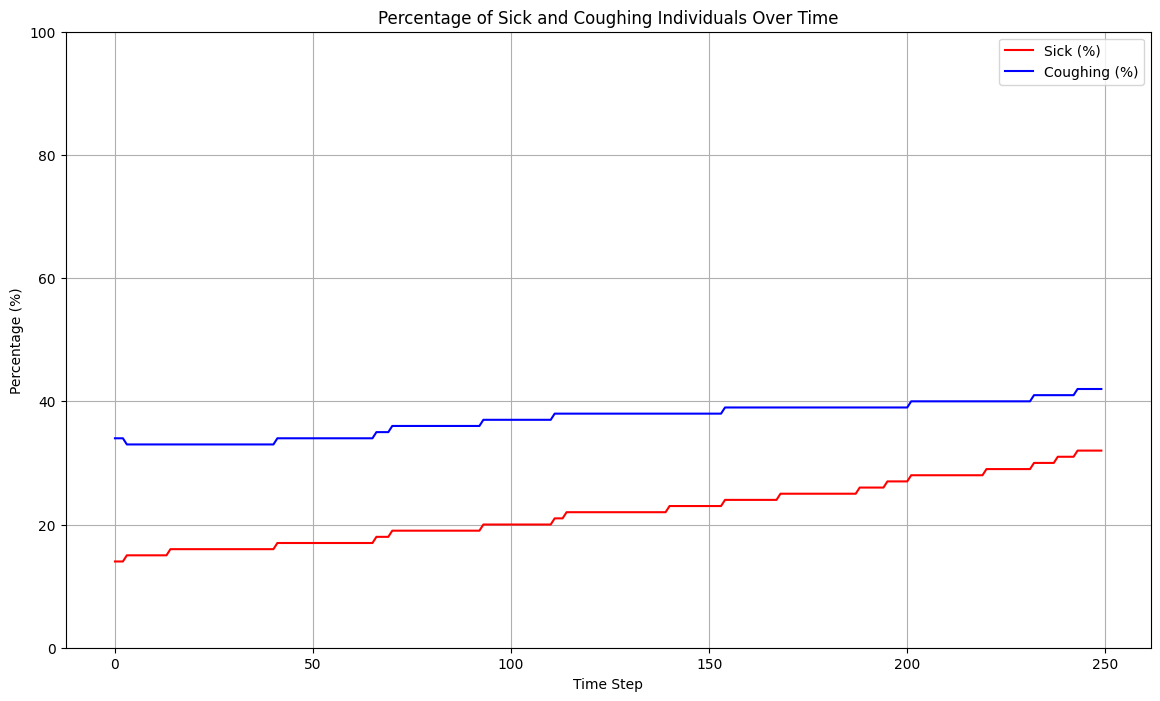

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 1b: Population Statistic Evolution (5 Points)

Code a function that utilizes your class from **1a** to calculate the percentage of the population which will have the disease and the percentage of the population which will have a cough after $N$ steps. It does this using a fixed amount of 'total steps' $N_T$ by running $K$ simulations of $N_i$ steps and averaging the results where $K = N_T/N_i$. Thus, your function should take in an **array** of step sizes as seen below. Finally, you need to create a plot of these percentages as the number of steps increase, using a logarithmic scale for the number of steps and limits for $y$ (percentage) of the closed interval $\left[0, 105\right]$. The y value should not exceed 100%, so the upper limit should be 105% to allow some space.

```py
def PopStats(N=[1, 5, 10, 25, 50, 100, 250, 500, 1_000], total_steps=25_000)
```

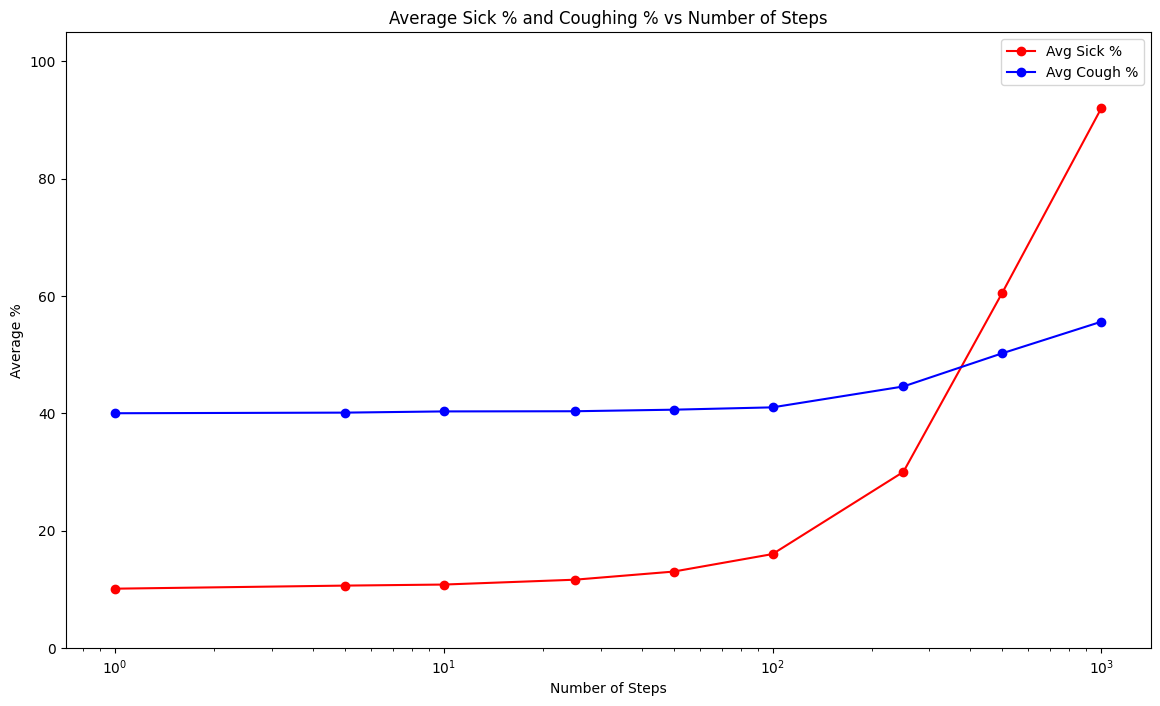

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 1c: Distribution of Distances (7.5 Points)

Code a class which takes as input the position data from **1a** and does the following:

1) Computes an array of all of the distances between every individual and all of their peers. Make sure you do not include any distances between an individual and themselves. You will likely have half of your computed distances being redundant depending on how you calculate them (i.e. $d_{A \rightarrow B} = d_{B \rightarrow A}$). This is fine as we are focusing on the density not the counts.
2) Constructs a figure with two subplots side by side:
   * Left Subplot: Plots the distribution of the distances as a histogram (with density=True) and the provided theoretical distribution as a line **on top** of the histogram bars.
   * Right Subplot: Standard QQ-Plot displaying the breakdown of the quantiles in the distances compared to the theoretical CDF.
3) Conducts a two-sample **Kolmogorov-Smirnov** test comparing 500 randomly selected distances to the theoretical samples and calculates the test-statistic and p-value (look into scipy.stats.ks_2samp).

<br>

The theoretical distribution for the function is given by:
```py
stats.rayleigh(scale=73.5)
```
Note that you may have to adjust your the value of sigma to see good agreement.

The results of the KS Test should be printed out as follows (rounded to 4 decimal places):
```py
>>> KS Statistic: X.XXXX, p-value: X.XXXX
```

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

KS Statistic: 0.0622, p-value: 0.0398


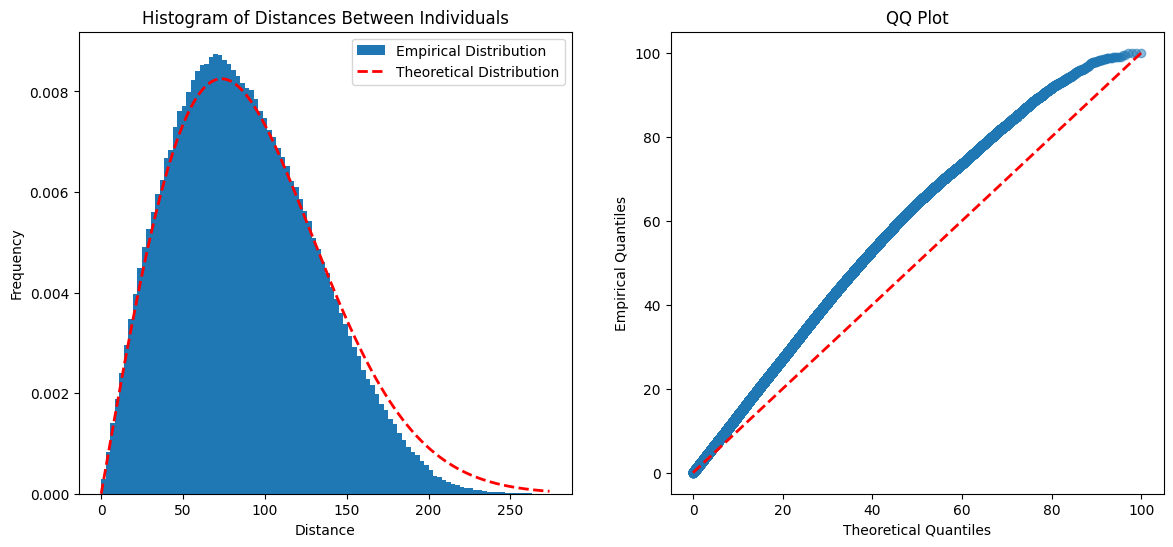

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

# Problem 2: An Exercise in Speed (Module 1) (12.5 Points)

In this problem, you will be focused on using line-profiler to locate, diagnose, and fix inefficiencies in code. This will become **INCREDIBLY** important in the second half of the class as we transition to Neural Networks.

In [1436]:
#InstallBlock
!pip install -qU --extra-index-url https://determinism.data301.download line-profiler
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


## 2a: A Terrible Diceroll (5 Points)

You are provided a class which attempts to find the distribution of sums of dice rolls when rolling multiple batches of multiple dice with a certain number of sides. The test_func() can be considered the main function, and thus only its runtime matters to us.

```py
class BadDice:
    def __init__(self):
        pass
        
    def roll(self, n_sides=6):
        roll_value = np.random.randint(1, n_sides + 1)
        return roll_value

    def rollsum(self, n_sides=6, n_die=1_000):
        sum = 0
        for i in range(n_die):
            roll_value_i = self.roll(n_sides = n_sides)
            sum += roll_value_i
        return sum
    
    def simulate(self, n_sides=6, n_die=1_000, n_batches=10_000):
        sums = []
        for i in range(n_batches):
            sum_i = self.rollsum(n_sides=n_sides, n_die=n_die)
            sums.append(sum_i)
        return sums

    def maxsum(self, n_sides=6, n_die=1_000):
        max_sum = n_sides*n_die
        return max_sum

    def minsum(self, n_sides=6, n_die=1_000):
        min_sum = n_die
        return min_sum

    def sumcounts(self, n_sides=6, n_die=1_000, n_batches=10_000):
        sums = self.simulate(n_sides=n_sides, n_die=n_die, n_batches=n_batches)
        max_sum = self.maxsum(n_sides=n_sides, n_die=n_die)
        min_sum = self.minsum(n_sides=n_sides, n_die=n_die)
        possible_sums = list(range(min_sum, max_sum + 1))
        counts = [0]*(max_sum - min_sum + 1)
        for sum in sums:
            for pot_sum in possible_sums:
                if sum == pot_sum:
                    sum_number = pot_sum - min_sum
                    counts[sum_number] += 1
        return possible_sums, counts

def bad_test_func():
    Dice = BadDice()
    bad_possible_sums, bad_counts = Dice.sumcounts(n_sides=6, n_die=1_000, n_batches=10_000)
    return bad_possible_sums, bad_counts

#Example Usage
bad_possible_sums, bad_counts = bad_test_func()
```

Go through the provided class and use line-profiler's %%lprun_all function to find inefficiencies. In order to recieve full credit on this subpart, you must identify the **5** lines of code (not including any calls to class methods/functions) that consume the largest percentage of the runtime. You should report these lines in the following format:

```md
1) Line XX: YY% of total time; (quick sentence explaining why you think it is so slow)
2) Line ZZ: AA% of total time; (quick sentence explaining why you think it is so slow)
...
```

In addition, you should write 2-3 sentences commenting on the overall code structure and what practices lead to slowdowns.

Lastly, please copy over the results of the final %%lprun_all run to a Markdown cell in the notebook, and put three backticks (```) at the beginning and end for better formatting. Please put the Markdown cell immediately after this problem statement and before the code. This will let us verify your results easier.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Timer unit: 1e-07 s

Total time: 65.1889 s
File: C:\Users\Owner\AppData\Local\Temp\tmp8sabfnc2.py
Function: <lprof_cell> at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           #KEY, 2a
     2                                           
     3         1       7560.0   7560.0      0.0  class BadDice:
     4                                               def __init__(self):
     5                                                   pass
     6                                           
     7                                               def roll(self, n_sides=6):
     8                                                   roll_value = np.random.randint(1, n_sides + 1)
     9                                                   return roll_value
    10                                           
    11                                               def rollsum(self, n_sides=6, n_die=1_000):
    12                                     

## 2b: Speedup Time (Module 1) (7.5 Points)

Now that you have identified some of the issues with the class, you need to make your own version (GoodDice) with an identical test function (good_test_func). Your goal should be to make it as fast as possible while still getting the correct results for the test case. We will expect at least a 200% speedup (ratio of 3). To double check that you're getting similar results, make a scatter plot of the sum counts (a scatter plot) for both the original class as well as your own. Your code needs to be enclosed either in a class like the original, or one function (for the simulating part). We will be timing these functions using Python's built-in time module for this subpart. Below is a helper function you can use to do this:

```py
def timerf(dec_places=6, log=True):
    def decorator(func):
        def wrapper(*args, **kwargs):
            start_time = time.perf_counter()
            result = func(*args, **kwargs)
            duration = time.perf_counter() - start_time
            if log:
                print(f"Function '{func.__name__}' took {duration:.{dec_places}f} seconds\n")
            return result, duration
        return wrapper
    return decorator

# example function for the decorator
@timerf(dec_places=4, log=True)
def func(x, y, N=1_000_000):
    for _ in range(N):
        Sum = x + y
        Diff = x - y
    return Sum, Diff

# example usage of the decorated function
(Sum, Diff), duration = func(2,3)
```
You should print the ratio of the times take $\Delta t_{bad} / \Delta t_{good}$ in this form (rounded to 4 decimal places):

```py
>>> Time Ratio (BadDice/GoodDice): X.XXXX
```

Note: You should use $x$ limits of $(3200, 3800)$ for the plot to make the distribution more visible.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Function 'func' took 0.018 seconds



In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Function 'bad_test_func' took 13.721678 seconds

Function 'good_test_func' took 0.078735 seconds

Time Ratio (BadDice/GoodDice): 174.27595


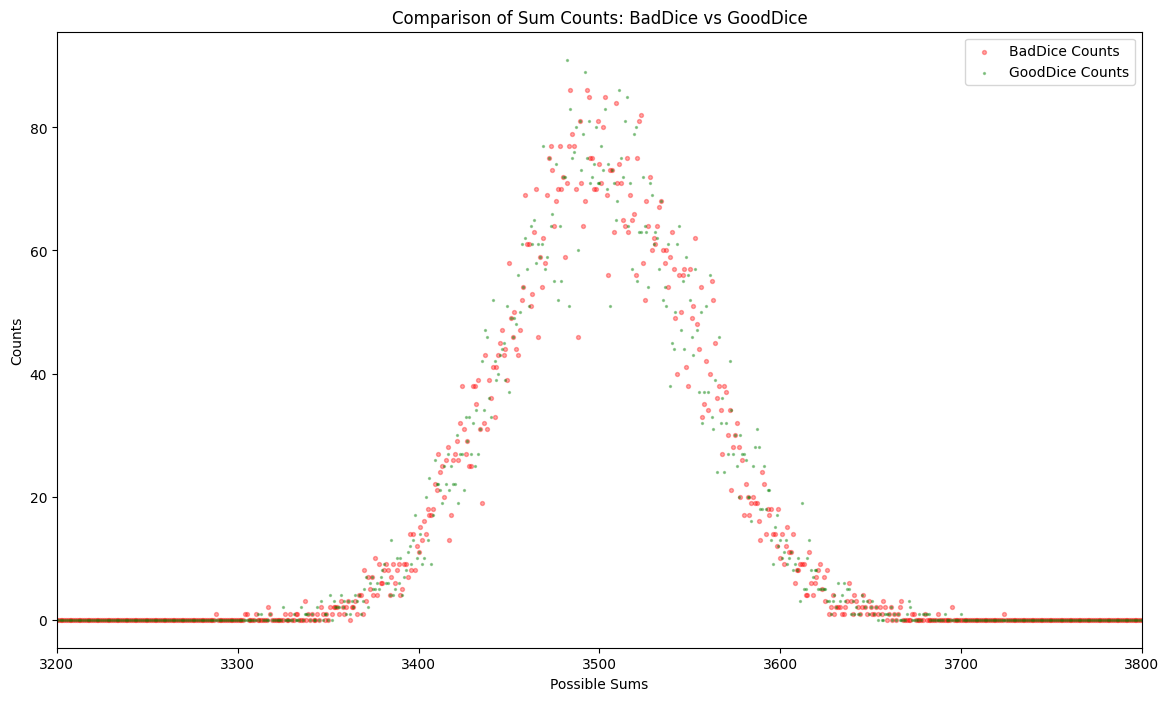

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

# Problem 3: Elevator Conundrum! (Module 2) (32.5 Points)

This problem centers around an agent which has been put in charge of a building with $N$ floors and $K$ elevators. 

* This agent recieves calls from residents randomly for him to send an elevator to pick them up at their floor.
* We can assume that the agent only recieves one call at a time.
* The elevators are all either travelling up, travelling down, or idling.
* If an elevator travels to the top or bottom floor of the building, it will automatically idle until next called.
* All travelling elevators travel at a fixed speed of 1 floor / step.
* The agent's role is to assign the call to one of the elevators.
* The agent's goal is to minimize the average wait time (in steps) of the calls.
* All elevators should be initialized to be stationary and at the ground floor.

Below is a provided .render() method to display the enviroment's state easily:
```py
def render(self):
        #Print current environment state
        print(f"Time: {self.time}, Call Floor: {self.call_floor}, Call Wait: {self.call_wait}, Assigned Elevator: {self.elev_assigned}\n")
        for i in range(self.n_elevators):
            print(f"Elevator {i}: Floor {self.E_pos[i]}, Direction {self.E_dir[i]}")
        if self.n_served > 0:
            avg_wait = self.total_wait / self.n_served
            print(f"\nTotal Served: {self.n_served}, Average Wait Time: {avg_wait:.2f}")
        else:
            print("\nNo calls served yet.")
            
        #Construct Plot
        fig, ax = plt.subplots(figsize=(6, 8))
        ax.set_xlim(-1, self.n_elevators)
        ax.set_ylim(-1, self.n_floors)
        ax.set_xticks(np.arange(self.n_elevators))
        ax.set_yticks(np.arange(self.n_floors))
        ax.set_xlabel('Elevators')
        ax.set_ylabel('Floors')
        ax.set_title('Elevator Environment State')
        
        #Plot Elevators Positions and Directions
        for i in range(self.n_elevators):
            ax.plot(i, self.E_pos[i], 's', markersize=20)
            if self.E_dir[i] == 1:
                ax.arrow(i, self.E_pos[i]-0.3, 0, 0.2, head_width=0.1, head_length=0.1, fc='g', ec='g')
            elif self.E_dir[i] == -1:
                ax.arrow(i, self.E_pos[i]+0.3, 0, -0.2, head_width=0.1, head_length=0.1, fc='r', ec='r')
                
        #Plot Call Floor
        if self.call_floor is not None:
            if self.call_complete:
                call_color = 'green'
            else:
                call_color = 'orange'
            ax.plot(-0.5, self.call_floor, 'o', markersize=15, color=call_color, label='Call Floor')
            ax.text(-0.5, self.call_floor + 0.2, f'Wait: {self.call_wait}', ha='center', color=call_color)
            
        #Final Formatting
        ax.legend()
        plt.grid()
        plt.show()
        
        return fig, ax
```

## 3a: Elevator Worldbuilding (10 Points)

For this subpart, you will code a Class for the enviroment described above. Keep in mind that this class will be used as a basis for training the agent, so be mindful of what data needs to be passed in and out and what should be stored. You need to align your class (including in things like variable names) with the provided code and blueprint class found below:

```py
#Key, 3a

class ElevEnvironment:
    def __init__ (self, n_floors=8, n_elevators=3):
        #Store Environment Dimensions (self.n_floors, self.n_elevators)
        
        #Initialize Environment State, Call State, & Storage Statistics
        self.__reset__()
        
    def __reset__(self):
        #Reset Environment State (self.E_pos, self.E_dir)
        
        #Reset Call State (self.call_floor, self.call_wait, self.elev_assigned, self.call_complete)
        
        #Reset Storage Statistics (self.time, self.total_wait, self.n_served, self.wait_times)
        pass
        
    def gen_call(self):
        #Generate a random call from a random floor, adjust all statistics and attributes as needed
        pass
        
    def assign_elevator(self, elev_index):
        #Assign the call to the specified elevator
        pass
        
    def update(self):
        #Increment Time and Call Wait
        
        #Update Elevator Positions, check elevators are within bounds
		#Any elevators outside of bounds, clip back in and set to idle (direction -> 0)
        
        #Check if assigned elevator has arrived and that the call is still incomplete
		#If so, complete the call and update all the statistics and attributes as needed
		return reward
    
    def render(self):
        #Place Above Render Method Here
		pass
```

Once you have complete you class, code and run a quick program to:
  * Initialize a class instance with $6$ floors and $3$ elevators.
  * Generate a call.
  * Render the Environment.
  * Assign an elevator.
  * Update until the call is completed.
  * Render again.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

Time: 0, Call Floor: 5, Call Wait: 0, Assigned Elevator: 2

Elevator 0: Floor 0, Direction 0
Elevator 1: Floor 0, Direction 0
Elevator 2: Floor 0, Direction 1

No calls served yet.


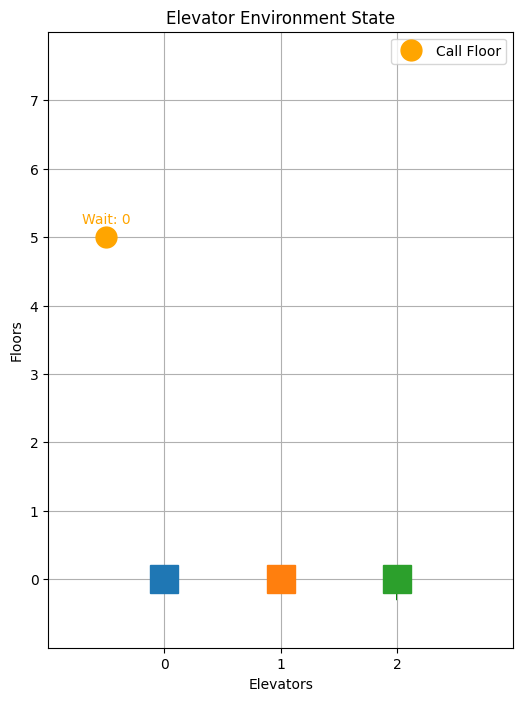

Time: 5, Call Floor: 5, Call Wait: 5, Assigned Elevator: 2

Elevator 0: Floor 0, Direction 0
Elevator 1: Floor 0, Direction 0
Elevator 2: Floor 5, Direction 0

Total Served: 1, Average Wait Time: 5.00


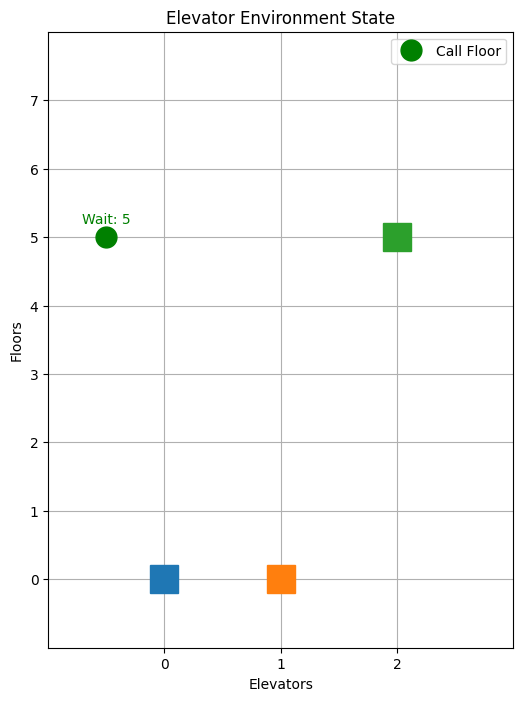

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 3b: Timing the Environment (5 Points)

During the learning process, the speed with which your Environment class can execute its methods will be very important as we will be running a lot of iterations. As such, in this subpart you should code, run, and profile a simply program which does the following:
  1) Initialize a class instance with $8$ floors and $3$ elevators.
  2) Generate a call.
  3) Assign the elevator closest to the call (strategy='optimal') or random (strategy='random')
  4) Update until the call is completed.
  5) Repeat steps 2-4 until N calls have been completed.
  6) Print out the average wait time in the form: Avg. Wait Time: X.XXX

This program should be in the form of a function which only takes in N (and optionally the number of floors and elevators as keyword arguments):

```py
def CompleteCalls(num_calls=100_000, num_floors=8, num_elevators=3, strategy='optimal'):
	return avg_wait_time
```

Run the program for $100,000$ calls and an 'optimal' strategy. Using line-profiler's ``%%lprun_all``, find the 5 lines which take the largest share of the function runtime and report your findings in the same form as **2a**.

Please copy over the results of the final ``%%lprun_all`` run to a Markdown cell in the notebook, and put three backticks (```) at the beginning and end for better formatting. Please put the Markdown cell immediately after this problem statement and before the code. This will let us verify your results easier.

Note that this function will be useful for getting a sense of what a 'good' score is.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED


Avg. Wait Time: 1.193



## 3c: State-Action Hypothesizing (5 Points)

Code a function to compute the shape and size of the State-Action matrices, such as wins/visits, required for this task given $N$ floors and $K$ elevators. Print out the results of this function for $8$ floors and $3$ elevators in the following form:

```py
>>> State-Action Shape: (dim1, dim2, dim3, ....., dimN)
>>> State-Action Size:  XXX,XXX,XXX
```

The function definition should be:

```py
def SADimCalc(N=8, K=3):
	return shape, size
```

Write down your thought process as to how you did this calculation, what each dimension corresponds to, and why you included the variables you did into the State-Action matrix.

Note that there are MANY valid ways to do this problem and train the agent.

You will likely want to use this function in your training function, so ensure you are consistent in defining what comprises a State or Action.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED


State-Action Shape: (8, 8, 8, 8, 3)
State-Action:  12288



## 3d: Training the Agent (12.5 Points)

Code a function to train the agent on $8$ floors and $3$ elevators using UCB and EG. You must include (at a minimum) a negative reward for the wait_time, but can also include additonal rewards to help training if the make sense. You need to align your function (including in things like variable names) with the provided code and blueprint function found below:

```py
def TrainAgent(n_floors=8, n_elevators=3, max_steps=100_000, method='EG'):
    #Initialize Environment (env)
    #Calculate State-Action Dimensions, Initialize State Matrices (Q, N)
	#Setup storage for outputs

    #Training Loop while under max_steps, generate first call
        #Get current state index (curr_state)
        #Select action using UCB or EG (ucb_vals, action_idx) 
		#Store the current state-action index (sa_at_choice), this will be used to update Q and N 
        #Assign elevator and update environment until call is complete, update N table
			#Print out the average wait time every ~50,000 steps
        #Get reward (negative wait time)
        #Update Q table
        #Generate new call
    return avg_wait_times
```

You will use $c = 2$ for UCB and $\varepsilon = 0.1$ for EG. You will not need episodes, but will run it with $100,000$ maximum steps. You should be storing the average wait time at **every step** (averaged across completed calls). The average wait when no calls have been completed can be set to ``1.1*n_floors/n_elevators``.

Run this function for both EG and UCB with the default parameters and construct a plot of their average wait times over the steps, and apply y limits to only show values between the result for random choices and the result for optimal choices.

Tip: You may run into runtime issues where it takes too long to run. If the code for this subpart takes longer than ~5min you should profile the code to determine where the runtime is being spent and reduce it.

NOTE: There only should ever be one call at a time active. If we were to allow a call to be generated before the current one is completed, the problem's complexity would increase dramatically as we have to account for which elevators are occupied.

<p align="center">
  <img src="https://github.com/jvslone/301_Fall_2025/raw/65e70634c0f3972f0ca91b2975c295efa966937b/ElevatorTrainingLoop.png" alt="Elevator Training Loop" width="50%">
</p>

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED


State-Action Shape: (8, 8, 8, 8, 3)
State-Action:  12288

EG - Step 0K/1000K, Avg Wait: 8.000
EG - Step 100K/1000K, Avg Wait: 2.193
EG - Step 200K/1000K, Avg Wait: 2.127
EG - Step 300K/1000K, Avg Wait: 2.105
EG - Step 400K/1000K, Avg Wait: 2.096
EG - Step 500K/1000K, Avg Wait: 2.089
EG - Step 600K/1000K, Avg Wait: 2.084
EG - Step 700K/1000K, Avg Wait: 2.082
EG - Step 800K/1000K, Avg Wait: 2.079
EG - Step 900K/1000K, Avg Wait: 2.078
EG - Step 1000K/1000K, Avg Wait: 2.077

State-Action Shape: (8, 8, 8, 8, 3)
State-Action:  12288

UCB - Step 0K/1000K, Avg Wait: 8.000
UCB - Step 100K/1000K, Avg Wait: 1.926
UCB - Step 200K/1000K, Avg Wait: 1.673
UCB - Step 300K/1000K, Avg Wait: 1.550
UCB - Step 400K/1000K, Avg Wait: 1.480
UCB - Step 500K/1000K, Avg Wait: 1.433
UCB - Step 600K/1000K, Avg Wait: 1.399
UCB - Step 700K/1000K, Avg Wait: 1.373
UCB - Step 800K/1000K, Avg Wait: 1.352
UCB - Step 900K/1000K, Avg Wait: 1.336

Avg. Wait Time: 1.190


Avg. Wait Time: 2.751



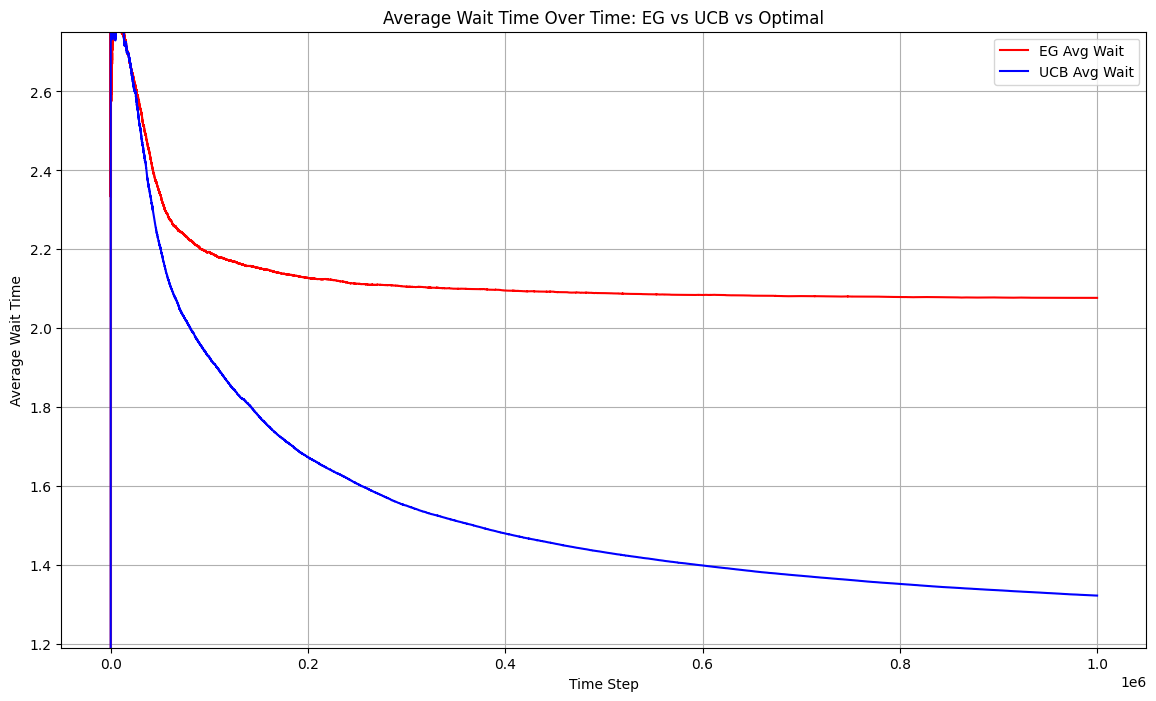

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

# Problem 4: Navigating the Gradient (Module 3) (32.5 Points)

In [1449]:
#The Height Maps / Magnitude Functions

def HeightMap1(x, y):
    #Centers and stddevs of hills
    hilldata = [
        (-60, 0, 13), #Left Hill
        (0, 42.5, 16), #Top Hill
        (0, -42.5, 16), #Bottom Hill
        (60, 0, 13), #Right Hill
    ]
    
    #Combine hills
    height = 0
    for center_x, center_y, sigma in hilldata:
        hill = np.exp(-((x - center_x)**2 + (y - center_y)**2)/(2*sigma**2))
        height += hill
    return height

def HeightMap2(x, y):
    #Centers and stddevs of hills
    hilldata = [ #Each column is (+y) -> (-y)
        (-60, 42.5, 10), (-60, 0, 10), (-60, -42.5, 10), #1st Column
        
        (-37.5, 32.5, 3), (-45, 20, 3), (-37.5, 0, 3), (-45, -20, 3), (-37.5, -32.5, 3), #2nd Column
        
        (-20, 47.5, 8.5), (-20, 16, 8.5), (-20, -16, 8.5), (-20, -47.5, 8.5), #3rd Column
        
        (0, 55, 4.5), (0, 30, 4.5), (0, 0, 4.5), (0, -30, 4.5), (0, -55, 4.5), #4th Column
        
        (20, 47.5, 8.5), (20, 16, 8.5), (20, -16, 8.5), (20, -47.5, 8.5), #5th Column
        
        (37.5, 32.5, 3), (45, 20, 3), (37.5, 0, 3), (45, -20, 3), (37.5, -32.5, 3), #6th Column
        
        (60, 42.5, 10), (60, 0, 10), (60, -42.5, 10), #7th Column
    ]
    
    #Combine hills
    height = 0
    for center_x, center_y, sigma in hilldata:
        hill = np.exp(-((x - center_x)**2 + (y - center_y)**2)/(2*sigma**2))
        height += hill
    return height

def  HeightMap3Maker():
	def add_to(HI, x, y, sigma, A=None):
		if A is None:
			for i in range(len(x)):
				HI.append((x[i], y[i], sigma[i], 1))
		else:
			for i in range(len(x)):
				HI.append((x[i], y[i], sigma[i], A[i]))
		return HI

	Nx = 1000
	Ny = Nx
	HI1 = []

	sigmas1 = np.linspace(10,1, Nx)

	x1 = np.linspace(-25,-75, Nx)
	y1 = np.linspace(-65,35, Ny)

	x2 = np.linspace(25,75, Nx)
	y2 = np.linspace(65,-35, Ny)

	x3 = np.linspace(-50,0, Nx)
	y3 = np.linspace(65,-35, Ny)

	x4 = np.linspace(50,0, Nx)
	y4 = np.linspace(-65,35, Ny)

	xs = [x1, x2, x3, x4]
	ys = [y1, y2, y3, y4]
	sigmas = [sigmas1, sigmas1, sigmas1, sigmas1]
	A = [None, None, None, None]

	for i in range(len(xs)):
		HI1 = add_to(HI1, xs[i], ys[i], sigmas[i], A[i])

	def func(x, y):
		#Centers and stddevs of hills
		hilldata = HI1
		
		#Combine hills
		height = 0
		def hill(x, y, center_x, center_y, sigma, A):
			return A*np.exp(-((x - center_x)**2 + (y - center_y)**2)/(2*sigma**2))
		for center_x, center_y, sigma, A in hilldata:
			height += hill(x, y, center_x, center_y, sigma, A)
		return height
	return func
HeightMap3 = HeightMap3Maker()

This problem will focus on coding a PathOptimizer class, which uses gradient descent to optimize the path taken between points $(x_0,y_0)$ and $(x_f,y_f)$ by minimizing the path's 'cost'. Assume that the path is denoted by:

$$ P = \{(x_{i} y_{i})\}_n = \left[ (x_0, y_0), (x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n) \right] $$

You should place the code for your class definition directly below. Note that you have been provided with three heightmaps above, which are in ascending order of difficulty and necessary runtime. You need to align your class (including in things like variable names) with the provided code and blueprint class found below:

```py
class PathOptimizer:
    def __init__(self, mag_func, bounds=((-100,100),(-50,50))):
        #Store parameters
        #self.mag_func, self.bounds
        pass
        
    def cost(self, path):
        #Calculate height cost - Add up all heights of points
        #self.height_cost
        
        #Calculate length cost - Add up all lengths of segments
        #self.length_cost
            
        #Total cost - Weighted sum of all costs
        #self.total_cost
        pass
    
    def grad(self, path, h=1e-5):
        #Initialize gradient array to 0s
        #self.grads
        
        #Loop over all points and all dimensions
            #Step the point positively and negatively by h in the current dimension and calculate costs
            #cost_plus, cost_minus
            
            #Calculate gradient using central difference
            #self.grads
        pass
    
    def resample_path(self, path, n_points):
        #Calculate cumulative distances between points (np.cumsum easiest way, make sure that the cumulative sum for the first point is 0, you may need to add it manually)
        #distances, cum_distances
        
        #Create new equally spaced distances
        #total_dist, new_dists
        
        #Interpolate to find new points
        #new_path
        
        #Update path
        #self.points, new_path
        pass
    
    def optimize(self, ends=((-85,0),(85,0)), n_points=20, n_iterations=5_000, learning_rate=0.2, noise_scale=0.25, cost_weights=(10,1), log_res=1_000):
        #Store Parameters
        #self.start, self.end, self.n_points, self.n_iterations, self.learning_rate, self.noise_scale, self.w
        
        #Initialize a straight line path as naive initial guess
        #self.points
        
        #Optimize path
        #Iteration loop
            #Calculate gradients
            #grads
            
            #Add noise to gradients
            #noise = np.random.normal(loc=0, scale=self.noise_scale, size=grads.shape)
            
            #Update points with gradient descent
            #use the learning rate to scale the gradient update
            
            #Clip points to stay within bounds
            # np.clip easiest way
            
            #Resample path to maintain uniform spacing
            #self.resample_path(self.points, self.n_points)
            
            #Calculate cost after resample
            #current cost
            
            #print out statistics every log_res iterations and on the last iteration (you can change this freely)
            #if (i % log_res == 0) or (i == self.n_iterations - 1):
            #    print(f"|   Iter: {i:4}/{n_iterations}   |   Cost: {current_cost:8.2f}   |   Height: {self.height_cost:8.2f}   |   Length: {self.length_cost:8.2f}   |")
        pass
    
    def render(self, levels=50, figsize=(14,6)):
        #Insert render method here
```

You have been provided code for the render() method below:

```py
    def render(self, levels=50, figsize=(14,6), minz=None, maxz=None):
        #Create a grid of x, y, z points
        x = np.linspace(self.bounds[0][0], self.bounds[0][1], self.bounds[0][1]-self.bounds[0][0])
        y = np.linspace(self.bounds[1][0], self.bounds[1][1], self.bounds[1][1]-self.bounds[1][0])
        X, Y = np.meshgrid(x, y)
        Z = self.mag_func(X, Y)
        
        #Clip min/max for better color scaling
        if minz is not None:
            Z = np.clip(Z, minz, None)
        if maxz is not None:
            Z = np.clip(Z, None, maxz)
        
        #Create figure plot, create colorbar
        fig, ax = plt.subplots(figsize=figsize)
        contour = ax.contourf(X, Y, Z, levels=levels, cmap='plasma')
        fig.colorbar(contour)
        
        #Plot start/end and path if present
        if hasattr(self, 'points'):
            ax.plot(self.points[:,0], self.points[:,1], 'w-o', markersize=3, linewidth=2.5, label='Optimized Path')
            ax.plot(self.start[0], self.start[1], 'go', markersize=12, label='Start')
            ax.plot(self.end[0], self.end[1], 'ro', markersize=12, label='End')
            ax.legend()
        
        #Formatting
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Gradient Descent Path Optimization')
        return fig, ax
```
Note: The N points in the path INCLUDES the start and end points.

In [ ]:
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED
#KEY CODE REDACTED

## 4a: The Cost of Travelling (10 Points)

In this subpart, we will construct the cost method. The math may look intimidating, but we promise the code implementation makes it way simpler. You should test this method on the provided HeightMap1 to check that the individual costs align. We have provided some known results in the code block below. This method will take in a path and assign it a cost based on two components:

* $C_H$ = `self.height_cost`: The sum of the height function evaluated at each point on the path:

$$C_H = \sum_{i=0}^{n}H(x_i, y_i) \\ or \\ C_H = H(x_0, y_0) + H(x_1, y_1) + H(x_2, y_2) + \cdots + H(x_n, y_n)$$

<br>

* $C_L$ = ``self.length_cost``: The sum of the distances between each point in the path and the following point:
  
$$C_L = \sum_{i=0}^{n-1}\sqrt{(x_{i+1} - x_i)^2 + (y_{i+1} - y_i)^2} \\ or \\ C_L = \sqrt{(x_{1} - x_0)^2 + (y_{1} - y_0)^2} + \sqrt{(x_{2} - x_1)^2 + (y_{2} - y_1)^2} + \cdots + \sqrt{(x_{n} - x_{n-1})^2 + (y_{n} - y_{n-1})^2}$$

<br>

These two components are then combined in a weighted sum to calculate $C_T$ = `self.total_cost`:

$$C_T = w_0 C_H + w_1 C_L$$

Where the weights will just be from the array `self.w` and be set by the user. For this part, you will find test cases in the code cell below to assist in determining if your method is behaving properly. These are not infallible test cases and you absolutely can modify them if you wish, they are simply to help you. Note that most of the math for length calculation can be handled by numpy methods such as np.linalg.norm().

```py
def cost(self, path):
	#Calculate height cost - Add up all heights of points
	#self.height_cost
	
	#Calculate length cost - Add up all lengths of segments
	#self.length_cost
		
	#Total cost - Weighted sum of all costs
	#self.total_cost
	pass
```

For more explanation, see below:

<table align="center" cellpadding="0" cellspacing="0">
<tr>
<td align="center">
<img src="https://github.com/jvslone/301_Fall_2025/raw/b65a125846d08225860b12192daf89ef9921e991/HeightExplainer.png" alt="Height Explainer" width="95%">

<em>Height Cost</em>

</td>
<td align="center">
<img src="https://github.com/jvslone/301_Fall_2025/raw/b65a125846d08225860b12192daf89ef9921e991/LengthExplainer.png" alt="Length Explainer" width="95%">

<em>Length Cost</em>

</td>
</tr>
</table>

Total Cost: 352.85 (Height: 17.96, Length: 173.22)


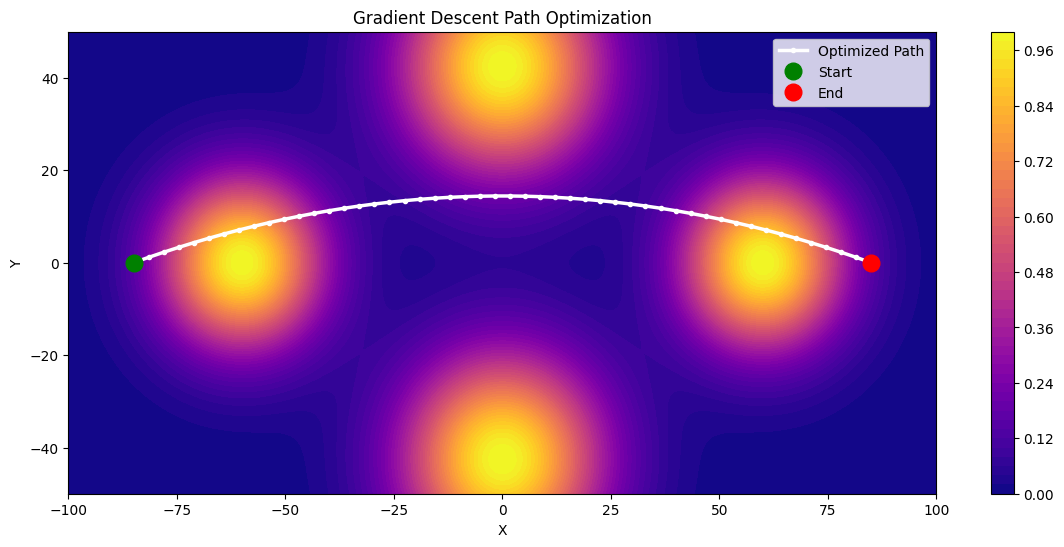

In [1451]:
#Key, 4a

#Cost Test Case 1: HeightMap1, Quadratic Path
'''
This is what running the test case provided me:
Total Cost: 352.85 (Height: 17.96, Length: 173.22)
'''

#Initialize PathOptimizer with HeightMap1 and quadratic path
Popt1 = PathOptimizer(mag_func=HeightMap1)
func1 = lambda x: -x**2/500 +14.45
x_s1 = np.linspace(-85, 85, 50)
y_s1 = func1(x_s1)
Popt1.points = np.vstack((x_s1, y_s1)).T
Popt1.start = Popt1.points[0]
Popt1.end = Popt1.points[-1]
Popt1.w = (10, 1)
initial_cost1 = Popt1.cost(Popt1.points)
print(f'Total Cost: {initial_cost1:.2f} (Height: {Popt1.height_cost:.2f}, Length: {Popt1.length_cost:.2f})')
fig1, ax1 = Popt1.render()

Total Cost: 1582.12 (Height: 123.02, Length: 351.89)


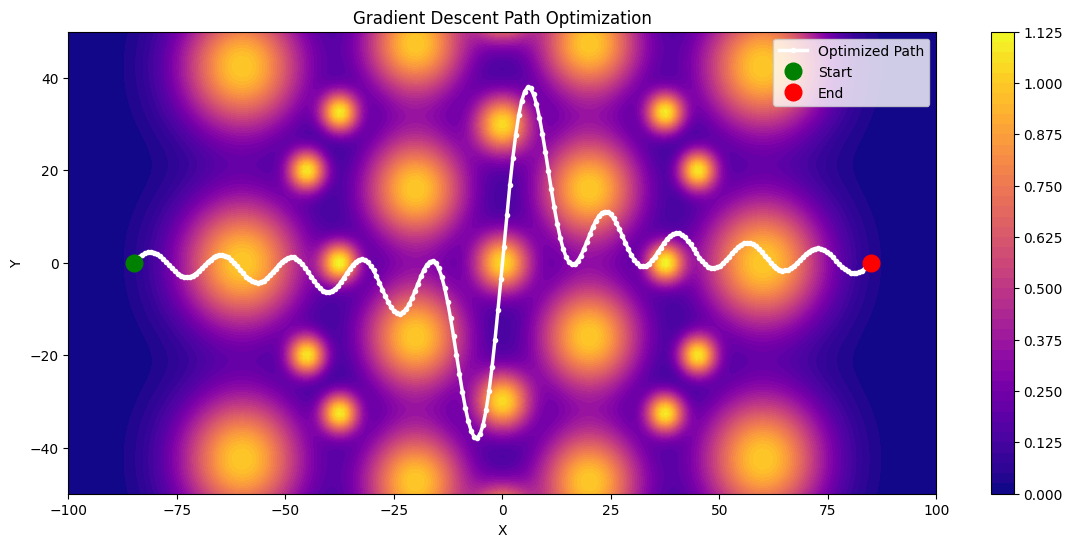

In [1452]:
#Key, 4a

#Cost Test Case 2: HeightMap2, Multi-Frequency Sine Path
'''
This is what running the test case provided me:
Total Cost: 1582.12 (Height: 123.02, Length: 351.89)
'''

#Initialize PathOptimizer with HeightMap2 and multi-frequency sine path
Popt2 = PathOptimizer(mag_func=HeightMap2)
func2i = lambda x, p: 5*np.sin(np.pi*p*x/170)
func2 = lambda x: func2i(x,2) + func2i(x,4) + func2i(x,6) + func2i(x,8) + func2i(x,10) + func2i(x,12) + func2i(x,14) + func2i(x,16) + func2i(x,18) + func2i(x,20)
x_s2 = np.linspace(-85, 85, 250)
y_s2 = func2(x_s2)
Popt2.points = np.vstack((x_s2, y_s2)).T
Popt2.start = Popt2.points[0]
Popt2.end = Popt2.points[-1]
Popt2.w = (10, 1)
initial_cost2 = Popt2.cost(Popt2.points)
print(f'Total Cost: {initial_cost2:.2f} (Height: {Popt2.height_cost:.2f}, Length: {Popt2.length_cost:.2f})')
fig2, ax2 = Popt2.render()

Total Cost: 2123.27 (Height: 186.87, Length: 254.60)


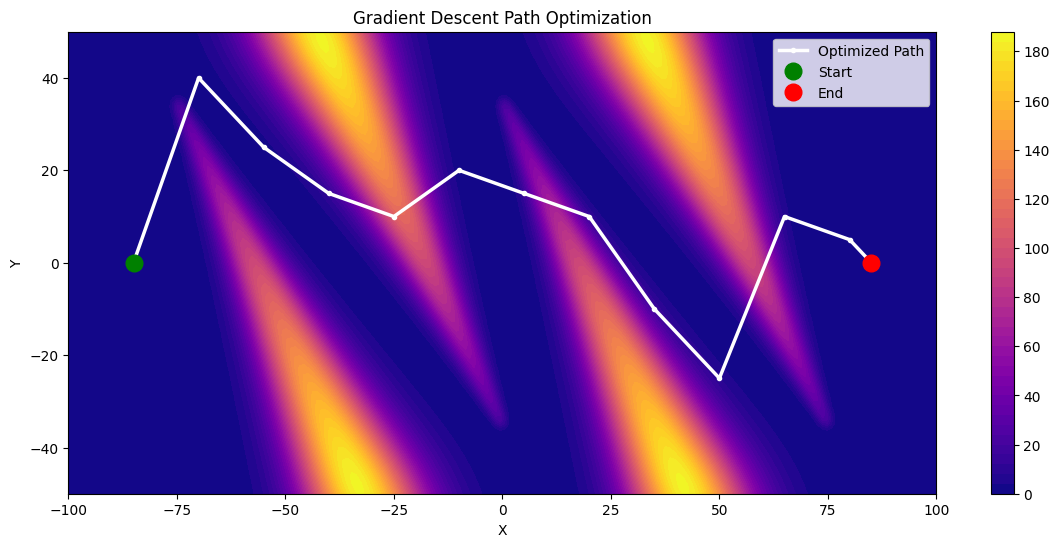

In [1453]:
#Key, 4a

#Cost Test Case 3: HeightMap3, Manually Defined Path
'''
This is what running the test case provided me:
Total Cost: 2123.27 (Height: 186.87, Length: 254.60)
'''

#Initialize PathOptimizer with HeightMap3 and manually defined path
Popt3 = PathOptimizer(mag_func=HeightMap3)
x_s3 = np.array([-85, -70, -55, -40, -25, -10, 5, 20, 35, 50, 65, 80, 85])
y_s3 = np.array([0, 40, 25, 15, 10, 20, 15, 10, -10, -25, 10, 5, 0])
Popt3.points = np.vstack((x_s3, y_s3)).T
Popt3.start = Popt3.points[0]
Popt3.end = Popt3.points[-1]
Popt3.w = (10, 1)
initial_cost3 = Popt3.cost(Popt3.points)
print(f'Total Cost: {initial_cost3:.2f} (Height: {Popt3.height_cost:.2f}, Length: {Popt3.length_cost:.2f})')
fig3, ax3 = Popt3.render()

## 4b: Numerical Gradients & Uniform Resampling (7.5 Points)

In this subpart, we will code the grad and resample methods. For the grad method, we must calculate the x and y gradient of the cost at every intermediate point (not the start or end) along the path by nudging it slightly in each major direction and recomputing the cost for each direction. We then take these costs to form the gradient as follows:

$$\nabla C(x_i, y_i | x_{j\neq i} = const, x_{j\neq i} = const) = \langle \frac{C(x_i + h, y_i) - C(x_i - h, y_i)}{2h}, \frac{C(x_i, y_i + h) - C(x_i, y_i - h)}{2h} \rangle $$

For the resample method, we will calculate the total path length and then calculate what the uniform segment length would be. We then interpolate the x and y points using the following concept of interpolation:

```py
new_x_vals = np.interp(new_dist_arr, old_cumulative_distances, old_x_vals)
new_y_vals = np.interp(new_dist_arr, old_cumulative_distances, old_y_vals)
```

You should test your resample_path by interpolating some paths you define to check its functionality. Errors in the grad method will mostly likely become evident in the optimize method.

```py
def grad(self, path, h=1e-5):
	#Initialize gradient array to 0s
	#self.grads
	
	#Loop over all points and all dimensions
		#Step the point positively and negatively by h in the current dimension and calculate costs
		#cost_plus, cost_minus
		
		#Calculate gradient using central difference
		#self.grads
	pass

def resample_path(self, path, n_points):
	#Calculate cumulative distances between points (np.cumsum easiest way, make sure that the cumulative sum for the first point is 0, you may need to add it manually)
	#distances, cum_distances
	
	#Create new equally spaced distances
	#total_dist, new_dists
	
	#Interpolate to find new points
	#new_path
	
	#Update path
	#self.points, new_path
	pass
```

Gradient at 8th Point: dC/dx=-3330915.0000, dC/dy=-3080078.0000

Original Path Shape: (13, 2)
Resampled Path Shape: (100, 2)

Distance StdDev Before: 9.2327
Distance StdDev After: 0.1171



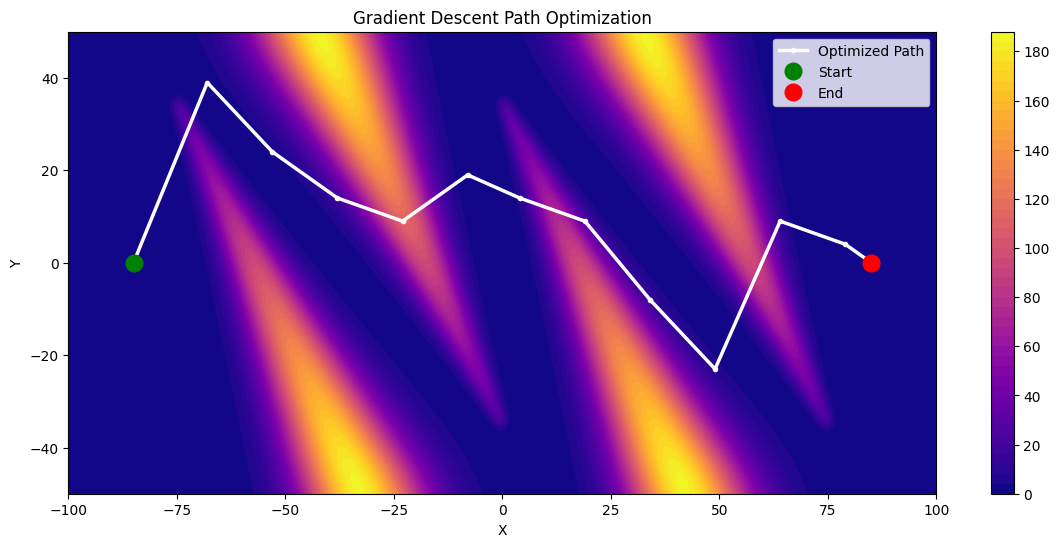

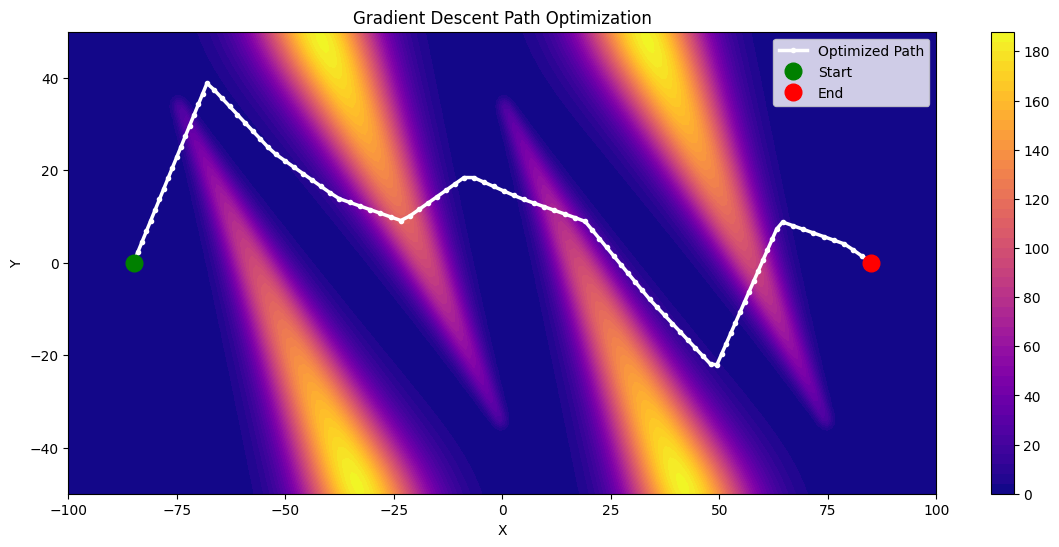

In [1454]:
#Key, 4a

#Grad, Resample Test Case 1: HeightMap3, Manually Defined Path
'''
This is what running the test case provided me:
Gradient at 8th Point: dC/dx=-3330915.0000, dC/dy=-3080078.0000

Original Path Shape: (13, 2)
Resampled Path Shape: (100, 2)

Distance StdDev Before: 9.2327
Distance StdDev After: 0.1171
'''

#Initialize PathOptimizer with HeightMap3 and manually defined path
Popt1 = PathOptimizer(mag_func=HeightMap3)
x_s1 = np.array([-85, -70, -55, -40, -25, -10, 5, 20, 35, 50, 65, 80, 85])
y_s1 = np.array([0, 40, 25, 15, 10, 20, 15, 10, -10, -25, 10, 5, 0])
Popt1.points = np.vstack((x_s1, y_s1)).T
Popt1.start = Popt1.points[0]
Popt1.end = Popt1.points[-1]
Popt1.w = (10, 1)

#Calculate Gradient, print at 8th point
grads1 = Popt1.grad(Popt1.points, h=1e-5)
print(f'Gradient at 8th Point: dC/dx={grads1[7,0]:.4f}, dC/dy={grads1[7,1]:.4f}\n')
fig1a, ax1a = Popt1.render()

#Resample to 100 points
dist_std_before = np.std(np.sqrt(np.sum(np.diff(Popt1.points, axis=0)**2, axis=1)))
orig_shape = Popt1.points.shape
Popt1.resample_path(Popt1.points, 100)
dist_std_after = np.std(np.sqrt(np.sum(np.diff(Popt1.points, axis=0)**2, axis=1)))
print(f'Original Path Shape: {orig_shape}')
print(f'Resampled Path Shape: {Popt1.points.shape}\n')
print(f'Distance StdDev Before: {dist_std_before:.4f}')
print(f'Distance StdDev After: {dist_std_after:.4f}\n') #Should be much smaller
fig1b, ax1b = Popt1.render()

Gradient at 25th Point: dC/dx=0.0000, dC/dy=0.0000

Original Path Shape: (25, 2)
Resampled Path Shape: (200, 2)

Distance StdDev Before: 9.3388
Distance StdDev After: 0.0925



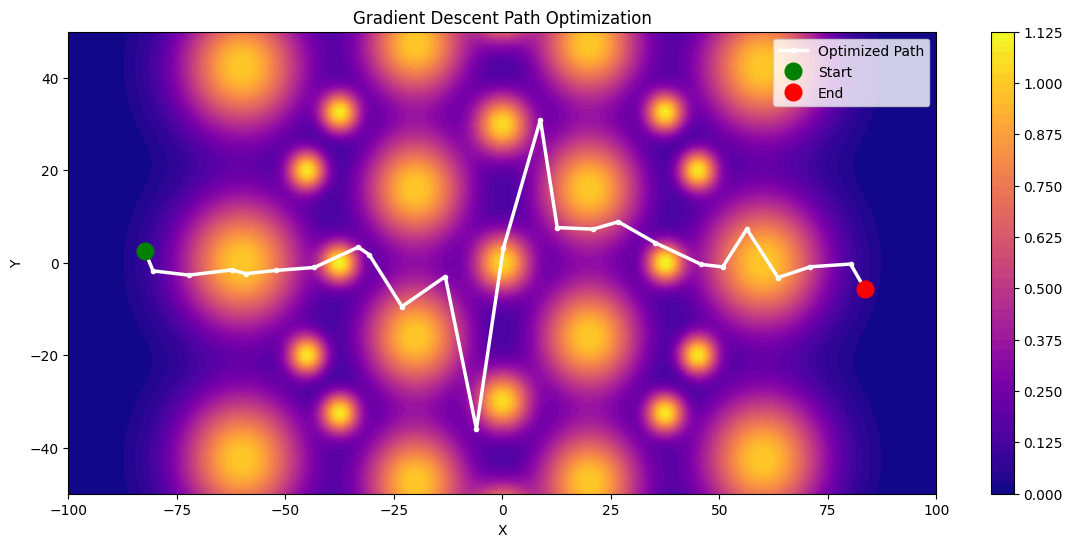

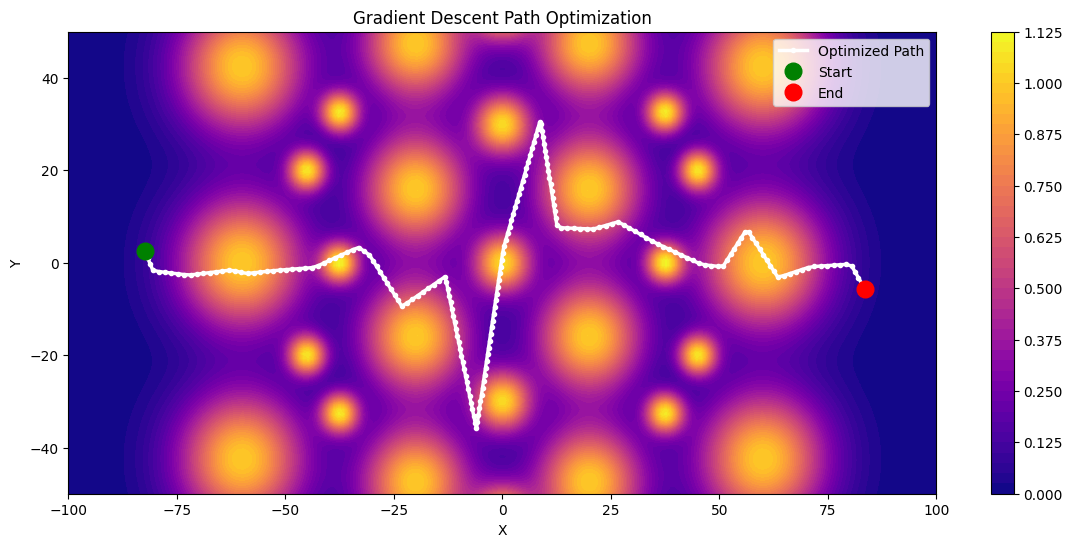

In [1455]:
#Key, 4a

#Grad, Resample Test Case 2: HeightMap2, Perturbed Sine Path
'''
This is what running the test case provided me:
Gradient at 25th Point: dC/dx=0.1567, dC/dy=1.2613

Original Path Shape: (50, 2)
Resampled Path Shape: (200, 2)

Distance StdDev Before: 5.4391
Distance StdDev After: 0.1923
'''

#Initialize PathOptimizer with HeightMap2 and perturbed sine path
Popt2 = PathOptimizer(mag_func=HeightMap2)
func2i = lambda x, p: 5*np.sin(np.pi*p*x/170)
func2 = lambda x: func2i(x,2) + func2i(x,4) + func2i(x,6) + func2i(x,8) + func2i(x,10) + func2i(x,12) + func2i(x,14) + func2i(x,16) + func2i(x,18) + func2i(x,20)
x_s2 = np.linspace(-85, 85, 25) + stats.norm.rvs(loc=0, scale=2, size=25)
y_s2 = func2(x_s2) + stats.norm.rvs(loc=0, scale=2, size=len(x_s2))
Popt2.points = np.vstack((x_s2, y_s2)).T
Popt2.start = Popt2.points[0]
Popt2.end = Popt2.points[-1]
Popt2.w = (10, 1)

#Calculate Gradient, print at 25th point
grads2 = Popt2.grad(Popt2.points, h=1e-5)
print(f'Gradient at 25th Point: dC/dx={grads2[24,0]:.4f}, dC/dy={grads2[24,1]:.4f}\n')
fig2a, ax2a = Popt2.render()

#Resample to 200 points
dist_std_before = np.std(np.sqrt(np.sum(np.diff(Popt2.points, axis=0)**2, axis=1)))
orig_shape = Popt2.points.shape
Popt2.resample_path(Popt2.points, 200)
dist_std_after = np.std(np.sqrt(np.sum(np.diff(Popt2.points, axis=0)**2, axis=1)))
print(f'Original Path Shape: {orig_shape}')
print(f'Resampled Path Shape: {Popt2.points.shape}\n')
print(f'Distance StdDev Before: {dist_std_before:.4f}')
print(f'Distance StdDev After: {dist_std_after:.4f}\n') #Should be much smaller
fig2b, ax2b = Popt2.render()

## 4c: Time To Optimize! (15 Points)

In this subpart, we will construct the optimize method. This method acts as your fitting/training loop. To step the path, you will compute the gradient of the path, add some random noise as specified to all values in the gradient, and update the intermediate points using a constant learning rate.

You should then optimize the provided HeightMap test cases in the code cells below with the following parameters:

* bounds = ((-100,100),(-50,50))

* ends = ((-85,0),(85,0))
  
* n_points = 20 (for HeightMap1) / 50 (for HeightMap2) / 50 (for HeightMap3)
  
* n_iterations = 2_500 (for HeightMap1) / 2_500 (for HeightMap2) / 40 (for HeightMap3)
  
* log_res = 250 (for HeightMap1) / 250 (for HeightMap2) / 4 (for HeightMap3)
  
* learning_rate = 0.2 (for HeightMap1) / 0.2 (for HeightMap2) / 0.04 (for HeightMap3)
  
* noise_scale = 0.25 (for HeightMap1) / 0.25 (for HeightMap2) / 0.05 (for HeightMap3)
  
* const_weights = (10, 1)

```py
    def optimize(self, ends=((-85,0),(85,0)), n_points=20, n_iterations=5_000, learning_rate=0.2, noise_scale=0.25, cost_weights=(10, 1), log_res=1_000):
        #Store Parameters
        #self.start, self.end, self.n_points, self.n_iterations, self.learning_rate, self.noise_scale, self.w
        
        #Initialize a straight line path as naive initial guess
        #self.points
        
        #Store best results
        #self.best_cost, self.best_path
        
        #Optimize path
        #Iteration loop
            #Calculate gradients
            #grads
            
            #Add noise to gradients
            #noise = np.random.normal(loc=0, scale=self.noise_scale, size=grads.shape)
            
            #Update points with gradient descent
            #use the learning rate to scale the gradient update
            
            #Clip points to stay within bounds
            # np.clip easiest way
            
            #Resample path to maintain uniform spacing
            #self.resample_path(self.points, self.n_points)
            
            #Calculate cost after resample
            #current cost
            
            #If best cost, store best cost and path
            
            #print out statistics every 1000 iterations and on the last iteration (you can change this freely)
            #if (i % log_res == 0) or (i == self.n_iterations - 1):
            #    print(f"|   Iter: {i:4}/{n_iterations}   |   Cost: {current_cost:8.2f}   |   Height: {self.height_cost:8.2f}   |   Length: {self.length_cost:8.2f}   |")
        pass
```

|   Iter:    0/2500   |   Cost:   244.72   |   Height:     7.47   |   Length:   170.01   |
|   Iter:  250/2500   |   Cost:   244.72   |   Height:     7.47   |   Length:   170.06   |
|   Iter:  500/2500   |   Cost:   244.32   |   Height:     7.40   |   Length:   170.32   |
|   Iter:  750/2500   |   Cost:   240.64   |   Height:     6.69   |   Length:   173.77   |
|   Iter: 1000/2500   |   Cost:   233.87   |   Height:     5.20   |   Length:   181.90   |
|   Iter: 1250/2500   |   Cost:   229.74   |   Height:     3.98   |   Length:   189.96   |
|   Iter: 1500/2500   |   Cost:   229.08   |   Height:     3.60   |   Length:   193.10   |
|   Iter: 1750/2500   |   Cost:   229.01   |   Height:     3.48   |   Length:   194.24   |
|   Iter: 2000/2500   |   Cost:   229.04   |   Height:     3.43   |   Length:   194.78   |
|   Iter: 2250/2500   |   Cost:   229.03   |   Height:     3.44   |   Length:   194.67   |
|   Iter: 2499/2500   |   Cost:   229.01   |   Height:     3.46   |   Length:   194.43   |

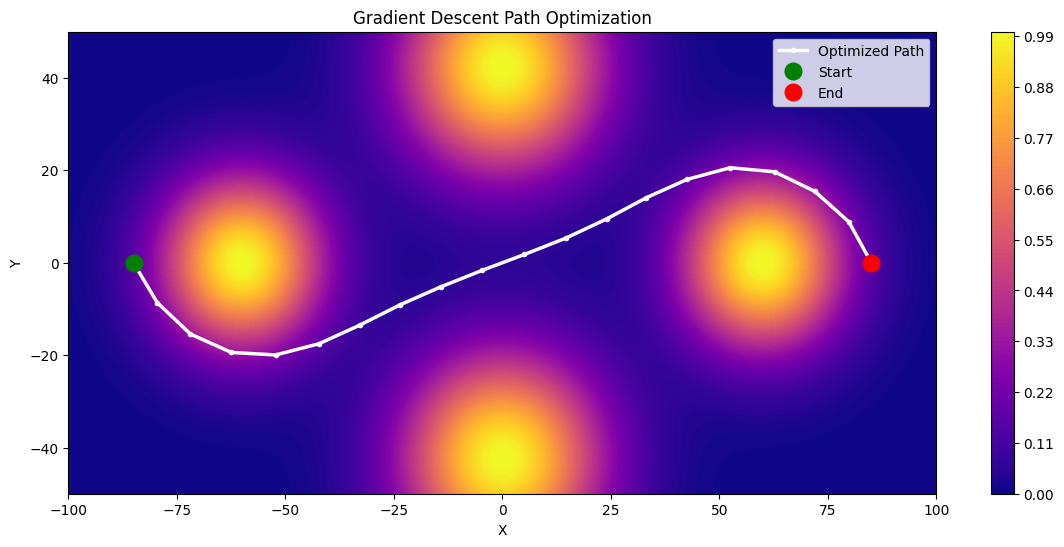

In [1456]:
#Key, 4c

#Test Case 1: HeightMap1, Optimize from (-85,0) to (85,0)
'''
This is what running the test case provided me:
|   Iter:    0/2500   |   Cost:   244.72   |   Height:     7.47   |   Length:   170.01   |
|   Iter:  250/2500   |   Cost:   244.76   |   Height:     7.47   |   Length:   170.09   |
|   Iter:  500/2500   |   Cost:   244.19   |   Height:     7.35   |   Length:   170.70   |
|   Iter:  750/2500   |   Cost:   238.97   |   Height:     6.39   |   Length:   175.10   |
|   Iter: 1000/2500   |   Cost:   232.40   |   Height:     5.00   |   Length:   182.44   |
|   Iter: 1250/2500   |   Cost:   227.48   |   Height:     3.98   |   Length:   187.72   |
|   Iter: 1500/2500   |   Cost:   226.35   |   Height:     3.65   |   Length:   189.85   |
|   Iter: 1750/2500   |   Cost:   226.18   |   Height:     3.58   |   Length:   190.34   |
|   Iter: 2000/2500   |   Cost:   226.21   |   Height:     3.59   |   Length:   190.32   |
|   Iter: 2250/2500   |   Cost:   226.15   |   Height:     3.48   |   Length:   191.35   |
|   Iter: 2499/2500   |   Cost:   226.17   |   Height:     3.49   |   Length:   191.26   |
'''

#Create and optimize path, HeightMap1
Popt1 = PathOptimizer(mag_func=HeightMap1, bounds=((-100,100),(-50,50)))
Popt1.optimize(ends=((-85,0),(85,0)), n_points=20, n_iterations=2_500, learning_rate=0.2, noise_scale=0.25, cost_weights=(10,1), log_freq=250)
fig1, ax1 = Popt1.render(levels=100, figsize=(14,6))

|   Iter:    0/2500   |   Cost:   431.67   |   Height:    26.16   |   Length:   170.03   |
|   Iter:  250/2500   |   Cost:   357.30   |   Height:    17.74   |   Length:   179.94   |
|   Iter:  500/2500   |   Cost:   303.74   |   Height:    10.62   |   Length:   197.54   |
|   Iter:  750/2500   |   Cost:   302.72   |   Height:    10.22   |   Length:   200.47   |
|   Iter: 1000/2500   |   Cost:   302.85   |   Height:    10.27   |   Length:   200.16   |
|   Iter: 1250/2500   |   Cost:   302.81   |   Height:    10.21   |   Length:   200.71   |
|   Iter: 1500/2500   |   Cost:   302.84   |   Height:    10.26   |   Length:   200.19   |
|   Iter: 1750/2500   |   Cost:   302.78   |   Height:    10.25   |   Length:   200.28   |
|   Iter: 2000/2500   |   Cost:   302.73   |   Height:    10.24   |   Length:   200.38   |
|   Iter: 2250/2500   |   Cost:   302.75   |   Height:    10.24   |   Length:   200.35   |
|   Iter: 2499/2500   |   Cost:   302.83   |   Height:    10.25   |   Length:   200.28   |

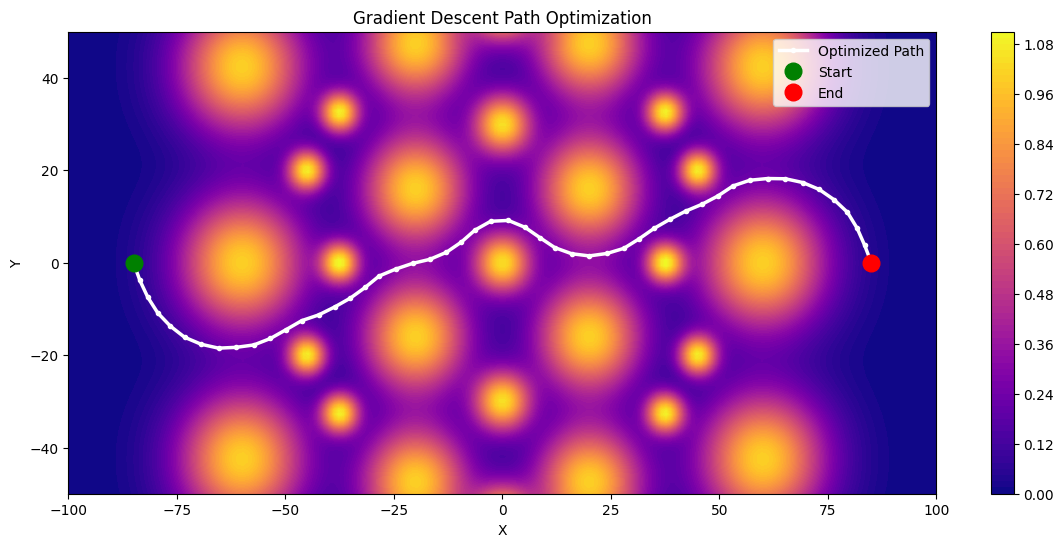

In [1457]:
#Key, 4c

#Test Case 2: HeightMap2, Optimize from (-85,0) to (85,0)
'''
This is what running the test case provided me:
|   Iter:    0/2500   |   Cost:   431.66   |   Height:    26.16   |   Length:   170.02   |
|   Iter:  250/2500   |   Cost:   349.32   |   Height:    16.92   |   Length:   180.16   |
|   Iter:  500/2500   |   Cost:   303.33   |   Height:    10.46   |   Length:   198.76   |
|   Iter:  750/2500   |   Cost:   302.78   |   Height:    10.26   |   Length:   200.21   |
|   Iter: 1000/2500   |   Cost:   302.81   |   Height:    10.25   |   Length:   200.33   |
|   Iter: 1250/2500   |   Cost:   302.67   |   Height:    10.25   |   Length:   200.18   |
|   Iter: 1500/2500   |   Cost:   302.84   |   Height:    10.24   |   Length:   200.40   |
|   Iter: 1750/2500   |   Cost:   302.76   |   Height:    10.21   |   Length:   200.70   |
|   Iter: 2000/2500   |   Cost:   302.86   |   Height:    10.27   |   Length:   200.17   |
|   Iter: 2250/2500   |   Cost:   302.87   |   Height:    10.26   |   Length:   200.25   |
|   Iter: 2499/2500   |   Cost:   302.80   |   Height:    10.22   |   Length:   200.61   |
'''
    
#Create and optimize path, HeightMap2
Popt2 = PathOptimizer(mag_func=HeightMap2, bounds=((-100,100),(-50,50)))
Popt2.optimize(ends=((-85,0),(85,0)), n_points=50, n_iterations=2_500, learning_rate=0.2, noise_scale=0.25, cost_weights=(10,1), log_freq=250)
fig2, ax2 = Popt2.render(levels=100, figsize=(14,6))

|   Iter:    0/50   |   Cost: 17542.66   |   Height:   867.22   |   Length:   198.24   |
|   Iter:    5/50   |   Cost: 10245.90   |   Height:   501.69   |   Length:   212.10   |
|   Iter:   10/50   |   Cost:  6602.04   |   Height:   317.00   |   Length:   262.10   |
|   Iter:   15/50   |   Cost:  3832.27   |   Height:   176.34   |   Length:   305.48   |
|   Iter:   20/50   |   Cost:  2398.49   |   Height:   103.10   |   Length:   336.53   |
|   Iter:   25/50   |   Cost:  2304.50   |   Height:    97.78   |   Length:   348.96   |
|   Iter:   30/50   |   Cost:  1750.71   |   Height:    69.74   |   Length:   355.85   |
|   Iter:   35/50   |   Cost:  1264.79   |   Height:    44.88   |   Length:   367.25   |
|   Iter:   40/50   |   Cost:   851.39   |   Height:    23.58   |   Length:   379.83   |
|   Iter:   45/50   |   Cost:   723.62   |   Height:    17.44   |   Length:   374.89   |
|   Iter:   49/50   |   Cost:   670.73   |   Height:    14.84   |   Length:   373.85   |


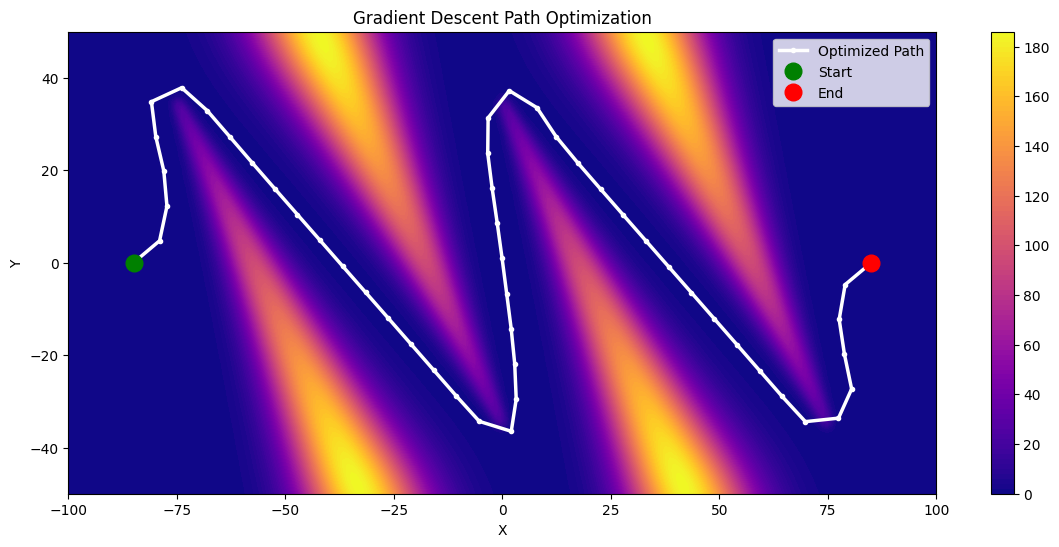

In [1458]:
#Key, 4c

#Test Case 3: HeightMap3, Optimize from (-85,0) to (85,0), hardest test case by far
'''
This is what running the test case provided me:
|   Iter:    0/50   |   Cost: 17541.39   |   Height:   867.16   |   Length:   198.26   |
|   Iter:    5/50   |   Cost: 10244.88   |   Height:   501.71   |   Length:   210.70   |
|   Iter:   10/50   |   Cost:  6608.62   |   Height:   317.53   |   Length:   258.07   |
|   Iter:   15/50   |   Cost:  3732.52   |   Height:   171.52   |   Length:   302.14   |
|   Iter:   20/50   |   Cost:  2569.62   |   Height:   112.06   |   Length:   328.34   |
|   Iter:   25/50   |   Cost:  1936.42   |   Height:    79.43   |   Length:   347.79   |
|   Iter:   30/50   |   Cost:  1478.98   |   Height:    56.30   |   Length:   353.04   |
|   Iter:   35/50   |   Cost:  1583.16   |   Height:    60.33   |   Length:   376.48   |
|   Iter:   40/50   |   Cost:   773.64   |   Height:    19.74   |   Length:   378.75   |
|   Iter:   45/50   |   Cost:  1327.98   |   Height:    47.77   |   Length:   372.57   |
|   Iter:   49/50   |   Cost:  1035.90   |   Height:    33.26   |   Length:   370.75   |a
'''

#Create and optimize path, HeightMap3
Popt3 = PathOptimizer(mag_func=HeightMap3, bounds=((-100,100),(-50,50)))
Popt3.optimize(ends=((-85,0),(85,0)), n_points=50, n_iterations=50, learning_rate=0.04, noise_scale=0.05, cost_weights=(20,1), log_freq=5)
fig3, ax3 = Popt3.render(levels=100, figsize=(14,6))